In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from scipy import stats
import numpy as np
from tqdm import tqdm, trange


In [2]:
# # download stock data direct to dataframe
# yf.pdr_override()
# df = pdr.get_data_yahoo('IBM', start='1995-01-01', end='2021-01-01', interval='1d')
# df

In [3]:
# read data
df = pd.read_csv('./resources/eurusd_hour_real.csv', index_col=0,parse_dates=True)
df

,Open,High,Low,Close
Date,,,,
2012-03-28 02:00:00,1.33221,1.33319,1.33204,1.33304
2012-03-28 03:00:00,1.33301,1.33304,1.33256,1.33287
2012-03-28 04:00:00,1.33290,1.33338,1.33255,1.33255
2012-03-28 05:00:00,1.33257,1.33348,1.33255,1.33322
2012-03-28 06:00:00,1.33325,1.33353,1.33154,1.33250
...,...,...,...,...
2020-04-29 18:00:00,1.08620,1.08851,1.08611,1.08713
2020-04-29 19:00:00,1.08711,1.08823,1.08659,1.08748
2020-04-29 20:00:00,1.08747,1.08788,1.08691,1.08708


In [4]:
for index, row in df.iterrows():
    
    df.loc[index,'real_body'] = df.loc[index,'Close'] - df.loc[index,'Open']
    
    if df.loc[index,'Close'] >= df.loc[index,'Open']: 
        df.loc[index,'upper_shadow'] = df.loc[index,'High'] - df.loc[index,'Close']
        df.loc[index,'lower_shadow'] = df.loc[index,'Open'] - df.loc[index,'Low']
        
    else:
        df.loc[index,'upper_shadow'] = df.loc[index,'Open'] - df.loc[index,'High']
        df.loc[index,'lower_shadow'] = df.loc[index,'Low'] - df.loc[index,'Close']  
        
# tidy up
#df.drop(['Open', 'High', 'Low'], axis = 1, inplace = True)
df = df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'})
df['date'] = df.index
df = df[['date', 'open', 'high', 'low', 'close', 'upper_shadow', 'lower_shadow', 'real_body']]
df


,date,open,high,low,close,upper_shadow,lower_shadow,real_body
Date,,,,,,,,
2012-03-28 02:00:00,2012-03-28 02:00:00,1.33221,1.33319,1.33204,1.33304,0.00015,0.00017,0.00083
2012-03-28 03:00:00,2012-03-28 03:00:00,1.33301,1.33304,1.33256,1.33287,-0.00003,-0.00031,-0.00014
2012-03-28 04:00:00,2012-03-28 04:00:00,1.33290,1.33338,1.33255,1.33255,-0.00048,0.00000,-0.00035
2012-03-28 05:00:00,2012-03-28 05:00:00,1.33257,1.33348,1.33255,1.33322,0.00026,0.00002,0.00065
2012-03-28 06:00:00,2012-03-28 06:00:00,1.33325,1.33353,1.33154,1.33250,-0.00028,-0.00096,-0.00075
...,...,...,...,...,...,...,...,...
2020-04-29 18:00:00,2020-04-29 18:00:00,1.08620,1.08851,1.08611,1.08713,0.00138,0.00009,0.00093
2020-04-29 19:00:00,2020-04-29 19:00:00,1.08711,1.08823,1.08659,1.08748,0.00075,0.00052,0.00037
2020-04-29 20:00:00,2020-04-29 20:00:00,1.08747,1.08788,1.08691,1.08708,-0.00041,-0.00017,-0.00039


In [5]:
# df = df[(np.abs(stats.zscore(df['open'])) < 3)]
# df = df[(np.abs(stats.zscore(df['high'])) < 3)]
# df = df[(np.abs(stats.zscore(df['low'])) < 3)]
# df = df[(np.abs(stats.zscore(df['close'])) < 3)]
# df = df[(np.abs(stats.zscore(df['lower_shadow'])) < 3)]
# df = df[(np.abs(stats.zscore(df['upper_shadow'])) < 3)]
# df = df[(np.abs(stats.zscore(df['real_body'])) < 3)]
# df

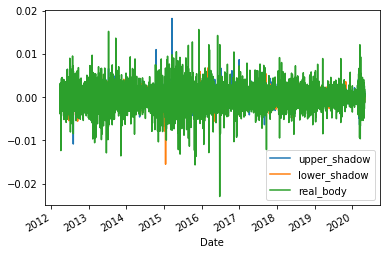

In [6]:
df[['upper_shadow', 'lower_shadow', 'real_body']].plot();

In [7]:
# data to csv
# df.to_csv('./resources/google_10yrs_ohlc.csv', index=True,)

In [8]:
# x = list(range(7))
# slopeall = []
# idxall = []

# for h in range(8, df.shape[0]-50):
#     slope_grp = []

#     for i in range(50):

#         prev7 = df.iloc[h+i-8:h+i-1,4].values
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x, prev7)
#         slope_grp.append([slope, r_value**2, std_err])
        
#     idxall.append(df.index[h+i])
#     slopeall.append(slope_grp)


In [9]:
# df['slope'] = 'neutral'

# for i in range(len(idxall)):
#     percentile50 = np.percentile(slopeall[i][0][0], 50)
#     percentile70 = np.percentile(slopeall[i][0][0], 70)
#     percentile30 = np.percentile(slopeall[i][0][0], 30)
    
#     if percentile50 > 0. and slopeall[i][49][0] >= percentile70 and slopeall[i][49][1] > 0.8:
#         df.loc[idxall[i], 'slope'] = 'positive'
# #         print(f'{idxall[i]} {slopeall[i][49]} is positive {percentile70}')
        
#     elif percentile50 < -0. and slopeall[i][49][0] <= percentile30 and slopeall[i][49][1] > 0.8:
#         df.loc[idxall[i], 'slope'] = 'negative'
# #         print(f'{idxall[i]} {slopeall[i][49]} is negative {percentile30}')
        
#     else:
#         df.loc[idxall[i], 'slope'] = 'neutral'
        

In [10]:

x = list(range(5))
slopeall = []
idxall = []

for h in trange(6, df.shape[0], desc="Generating...", ascii=True):

    prev7 = df.iloc[h-5:h,4].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, prev7)
    slopeall.append([slope, r_value**2, std_err])
    idxall.append(df.index[h])
#     print(slope)


Generating...: 100%|##########| 49994/49994 [00:18<00:00, 2755.64it/s]


In [11]:
df['slope'] = 'neutral'

for i in trange(len(idxall), desc="Generating...", ascii=True):

#     if percentile70 > 0. and slopeall[i][299] >= percentile70:
#     if slopeall[i][0] > 0.1 and slopeall[i][1] > 0.9:
    if slopeall[i][0] > 0.00005 and slopeall[i][1] > 0.65:
        df.loc[idxall[i], 'slope'] = 'positive'
#         print(f'{idxall[i]} {slopeall[i]} is positive')
        
#     elif percentile30 < 0. and slopeall[i][299] <= percentile30:
#     elif slopeall[i][0] < -0.05 and slopeall[i][1] > 0.9:
    elif slopeall[i][0] < -0.00005 and slopeall[i][1] > 0.65:
        df.loc[idxall[i], 'slope'] = 'negative'
#         print(f'{idxall[i]} {slopeall[i]} is negative')
        
    else:
        df.loc[idxall[i], 'slope'] = 'neutral'

Generating...: 100%|##########| 49994/49994 [00:41<00:00, 1207.90it/s]


In [12]:
# df['slope'] = 'negative'

# for i in range(len(idxall)):

#     if slopeall[i][0] > 0.:
#         df.loc[idxall[i-1], 'slope'] = 'positive'

#     else:
#         df.loc[idxall[i-1], 'slope'] = 'negative'


In [13]:
df['slope'].value_counts()

neutral     31837
negative     9086
positive     9077
Name: slope, dtype: int64

In [14]:
df['indicator'] = 'neutral'

for i in trange(2,df.shape[0], desc="Generating...", ascii=True):
    
    current = df.iloc[i,:]
    prev = df.iloc[i-1,:]
    prev2 = df.iloc[i-2,:]
    prev3 = df.iloc[i-3,:]
    idx = df.index[i]

    # doji
    if df.loc[idx, 'slope'] == 'negative' and \
        prev['close'] < prev['open'] and \
        abs(current['close'] - current['open']) < 0.01 and \
        current['open'] < prev['close']:
        df.loc[idx,'indicator'] = 'doji-buy'
    
    if df.loc[idx, 'slope'] == 'positive' and \
        prev['close'] > prev['open'] and \
        abs(current['close'] - current['open']) < 0.01 and \
        current['open'] > prev['close']:
        df.loc[idx,'indicator'] = 'doji-sell'

#     # harami   
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev['close'] < prev['open'] and \
#         current['close'] > current['open'] and \
#         prev['close'] < current['low'] and \
#         prev['open'] > current['high']:
#         df.loc[idx,'indicator'] = 'harami-buy'
        
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev['close'] > prev['open'] and \
#         current['close'] < current['open'] and \
#         prev['close'] > current['high'] and \
#         prev['open'] < current['low']:
#         df.loc[idx,'indicator'] = 'harami-sell'
       
#     # piercing
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev['close'] < prev['open'] and \
#         current['close'] > current['open'] and \
#         current['open'] < prev['close'] and \
#         current['close'] > prev['close'] and \
#         current['close'] < prev['open']:
#         df.loc[idx,'indicator'] = 'piercing-buy'
    
#     # dark cloud
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev['close'] > prev['open'] and \
#         current['close'] < current['open'] and \
#         current['open'] > prev['close'] and \
#         current['close'] < prev['close'] and \
#         current['close'] > prev['open']:
#         df.loc[idx,'indicator'] = 'darkcloud-sell'
    
#     # morning star
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev2['open'] > prev2['close'] and \
#         current['open'] < current['close'] and \
#         max(prev['close'], prev['open']) < prev2['close'] and \
#         current['open'] > max(prev['close'], prev['open']) and \
#         current['close'] > prev2['close'] + 0.5*(prev2['open']-prev2['close']):
#         df.loc[idx,'indicator'] = 'morningstar-buy'

#     # evening star
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev2['open'] < prev2['close'] and \
#         current['open'] > current['close'] and \
#         min(prev['close'], prev['open']) > prev2['close'] and \
#         current['open'] < min(prev['close'], prev['open']) and \
#         current['close'] < prev2['open'] + 0.5*(prev2['close']-prev2['open']):
#         df.loc[idx,'indicator'] = 'eveningstar-sell'
        
#     # engulfing
#     if df.loc[idx, 'slope'] == 'negative' and \
#         prev3['open'] > prev3['close'] and \
#         prev2['open'] > prev2['close'] and \
#         prev['open'] > prev['close'] and \
#         current['open'] < current['close'] and \
#         current['open'] < prev['close'] and \
#         current['close'] > prev['open']:
#         df.loc[idx,'indicator'] = 'engulfing-buy'
    
#     if df.loc[idx, 'slope'] == 'positive' and \
#         prev3['open'] < prev3['close'] and \
#         prev2['open'] < prev2['close'] and \
#         prev['open'] < prev['close'] and \
#         current['open'] > current['close'] and \
#         current['open'] > prev['close'] and \
#         current['close'] < prev['open']:
#         df.loc[idx,'indicator'] = 'engulfing-sell'



Generating...: 100%|##########| 49998/49998 [00:40<00:00, 1231.24it/s]


In [23]:
for i in range(0, df.shape[0]):
    idx = df.index[i]
    if df.loc[idx, 'slope'] == 'positive':
        print(f'{idx}')

2012-03-28 19:00:00
2012-03-28 20:00:00
2012-03-29 01:00:00
2012-03-29 20:00:00
2012-03-29 21:00:00
2012-03-29 22:00:00
2012-03-29 23:00:00
2012-03-30 00:00:00
2012-03-30 01:00:00
2012-03-30 02:00:00
2012-03-30 03:00:00
2012-03-30 05:00:00
2012-04-01 22:00:00
2012-04-01 23:00:00
2012-04-02 00:00:00
2012-04-02 08:00:00
2012-04-02 09:00:00
2012-04-02 18:00:00
2012-04-02 19:00:00
2012-04-03 01:00:00
2012-04-03 02:00:00
2012-04-03 03:00:00
2012-04-03 16:00:00
2012-04-04 19:00:00
2012-04-04 23:00:00
2012-04-05 01:00:00
2012-04-06 18:00:00
2012-04-09 05:00:00
2012-04-09 06:00:00
2012-04-09 10:00:00
2012-04-09 17:00:00
2012-04-09 18:00:00
2012-04-09 19:00:00
2012-04-10 01:00:00
2012-04-10 03:00:00
2012-04-10 04:00:00
2012-04-11 04:00:00
2012-04-11 05:00:00
2012-04-11 06:00:00
2012-04-11 07:00:00
2012-04-11 12:00:00
2012-04-11 23:00:00
2012-04-12 00:00:00
2012-04-12 12:00:00
2012-04-12 14:00:00
2012-04-12 19:00:00
2012-04-16 15:00:00
2012-04-16 16:00:00
2012-04-16 17:00:00
2012-04-16 18:00:00


2013-03-27 21:00:00
2013-03-28 03:00:00
2013-03-28 13:00:00
2013-03-28 14:00:00
2013-03-28 16:00:00
2013-03-29 10:00:00
2013-03-29 11:00:00
2013-03-29 12:00:00
2013-03-29 20:00:00
2013-04-01 06:00:00
2013-04-01 07:00:00
2013-04-01 08:00:00
2013-04-01 09:00:00
2013-04-01 10:00:00
2013-04-01 16:00:00
2013-04-01 17:00:00
2013-04-02 02:00:00
2013-04-02 03:00:00
2013-04-02 23:00:00
2013-04-03 06:00:00
2013-04-03 10:00:00
2013-04-03 11:00:00
2013-04-03 12:00:00
2013-04-03 14:00:00
2013-04-03 15:00:00
2013-04-03 21:00:00
2013-04-04 17:00:00
2013-04-04 18:00:00
2013-04-04 19:00:00
2013-04-04 20:00:00
2013-04-05 14:00:00
2013-04-05 15:00:00
2013-04-05 16:00:00
2013-04-08 09:00:00
2013-04-08 10:00:00
2013-04-08 11:00:00
2013-04-08 12:00:00
2013-04-08 13:00:00
2013-04-08 23:00:00
2013-04-09 00:00:00
2013-04-09 01:00:00
2013-04-09 02:00:00
2013-04-09 03:00:00
2013-04-09 16:00:00
2013-04-09 18:00:00
2013-04-09 19:00:00
2013-04-10 04:00:00
2013-04-10 22:00:00
2013-04-11 05:00:00
2013-04-11 06:00:00


2013-11-29 03:00:00
2013-11-29 04:00:00
2013-12-02 07:00:00
2013-12-02 08:00:00
2013-12-02 16:00:00
2013-12-02 17:00:00
2013-12-03 07:00:00
2013-12-03 08:00:00
2013-12-03 09:00:00
2013-12-03 10:00:00
2013-12-03 11:00:00
2013-12-03 12:00:00
2013-12-03 13:00:00
2013-12-03 14:00:00
2013-12-03 15:00:00
2013-12-03 16:00:00
2013-12-03 17:00:00
2013-12-03 18:00:00
2013-12-04 12:00:00
2013-12-04 13:00:00
2013-12-04 18:00:00
2013-12-04 19:00:00
2013-12-04 20:00:00
2013-12-05 05:00:00
2013-12-05 06:00:00
2013-12-05 07:00:00
2013-12-05 08:00:00
2013-12-05 16:00:00
2013-12-05 17:00:00
2013-12-05 18:00:00
2013-12-05 19:00:00
2013-12-05 20:00:00
2013-12-06 17:00:00
2013-12-06 18:00:00
2013-12-06 19:00:00
2013-12-06 20:00:00
2013-12-06 21:00:00
2013-12-08 22:00:00
2013-12-08 23:00:00
2013-12-09 00:00:00
2013-12-09 15:00:00
2013-12-09 20:00:00
2013-12-09 21:00:00
2013-12-10 03:00:00
2013-12-10 04:00:00
2013-12-10 05:00:00
2013-12-10 14:00:00
2013-12-10 15:00:00
2013-12-10 16:00:00
2013-12-11 08:00:00


2014-11-10 00:00:00
2014-11-10 04:00:00
2014-11-10 05:00:00
2014-11-10 11:00:00
2014-11-11 01:00:00
2014-11-11 02:00:00
2014-11-11 03:00:00
2014-11-11 14:00:00
2014-11-11 15:00:00
2014-11-11 16:00:00
2014-11-11 17:00:00
2014-11-11 18:00:00
2014-11-11 19:00:00
2014-11-11 20:00:00
2014-11-12 05:00:00
2014-11-12 06:00:00
2014-11-12 07:00:00
2014-11-12 08:00:00
2014-11-13 03:00:00
2014-11-13 10:00:00
2014-11-13 11:00:00
2014-11-13 17:00:00
2014-11-14 09:00:00
2014-11-14 10:00:00
2014-11-14 11:00:00
2014-11-14 18:00:00
2014-11-14 19:00:00
2014-11-14 20:00:00
2014-11-14 21:00:00
2014-11-17 03:00:00
2014-11-17 04:00:00
2014-11-18 02:00:00
2014-11-18 03:00:00
2014-11-18 04:00:00
2014-11-18 09:00:00
2014-11-18 10:00:00
2014-11-18 11:00:00
2014-11-18 12:00:00
2014-11-18 19:00:00
2014-11-19 08:00:00
2014-11-19 09:00:00
2014-11-19 19:00:00
2014-11-20 05:00:00
2014-11-20 06:00:00
2014-11-20 13:00:00
2014-11-20 14:00:00
2014-11-20 15:00:00
2014-11-21 02:00:00
2014-11-21 03:00:00
2014-11-21 04:00:00


2015-10-05 23:00:00
2015-10-06 00:00:00
2015-10-06 07:00:00
2015-10-06 09:00:00
2015-10-06 17:00:00
2015-10-06 20:00:00
2015-10-07 04:00:00
2015-10-07 12:00:00
2015-10-07 18:00:00
2015-10-07 19:00:00
2015-10-08 03:00:00
2015-10-08 04:00:00
2015-10-08 05:00:00
2015-10-08 06:00:00
2015-10-08 07:00:00
2015-10-08 09:00:00
2015-10-08 10:00:00
2015-10-08 17:00:00
2015-10-08 18:00:00
2015-10-08 23:00:00
2015-10-09 00:00:00
2015-10-09 06:00:00
2015-10-09 10:00:00
2015-10-09 11:00:00
2015-10-09 13:00:00
2015-10-09 18:00:00
2015-10-12 00:00:00
2015-10-12 01:00:00
2015-10-12 10:00:00
2015-10-13 05:00:00
2015-10-13 06:00:00
2015-10-13 07:00:00
2015-10-13 08:00:00
2015-10-14 01:00:00
2015-10-14 08:00:00
2015-10-14 09:00:00
2015-10-14 18:00:00
2015-10-14 19:00:00
2015-10-14 20:00:00
2015-10-16 04:00:00
2015-10-16 05:00:00
2015-10-16 06:00:00
2015-10-16 07:00:00
2015-10-16 14:00:00
2015-10-16 15:00:00
2015-10-19 01:00:00
2015-10-19 02:00:00
2015-10-19 07:00:00
2015-10-19 19:00:00
2015-10-19 20:00:00


2016-08-19 16:00:00
2016-08-22 10:00:00
2016-08-22 11:00:00
2016-08-22 12:00:00
2016-08-22 14:00:00
2016-08-22 15:00:00
2016-08-23 03:00:00
2016-08-24 23:00:00
2016-08-25 10:00:00
2016-08-25 11:00:00
2016-08-25 23:00:00
2016-08-26 00:00:00
2016-08-26 01:00:00
2016-08-26 02:00:00
2016-08-26 03:00:00
2016-08-26 12:00:00
2016-08-26 13:00:00
2016-08-26 14:00:00
2016-08-29 05:00:00
2016-08-29 06:00:00
2016-08-29 19:00:00
2016-08-30 22:00:00
2016-08-30 23:00:00
2016-08-31 00:00:00
2016-08-31 17:00:00
2016-08-31 19:00:00
2016-09-01 17:00:00
2016-09-02 13:00:00
2016-09-02 14:00:00
2016-09-05 01:00:00
2016-09-05 04:00:00
2016-09-05 05:00:00
2016-09-05 06:00:00
2016-09-05 07:00:00
2016-09-05 18:00:00
2016-09-06 09:00:00
2016-09-06 10:00:00
2016-09-06 11:00:00
2016-09-06 16:00:00
2016-09-06 17:00:00
2016-09-06 18:00:00
2016-09-06 19:00:00
2016-09-07 05:00:00
2016-09-08 02:00:00
2016-09-08 03:00:00
2016-09-08 08:00:00
2016-09-08 09:00:00
2016-09-08 10:00:00
2016-09-08 11:00:00
2016-09-08 12:00:00


2017-07-13 01:00:00
2017-07-13 02:00:00
2017-07-13 03:00:00
2017-07-13 04:00:00
2017-07-13 07:00:00
2017-07-13 20:00:00
2017-07-14 14:00:00
2017-07-14 19:00:00
2017-07-14 20:00:00
2017-07-17 12:00:00
2017-07-17 13:00:00
2017-07-17 14:00:00
2017-07-17 15:00:00
2017-07-17 16:00:00
2017-07-17 17:00:00
2017-07-17 18:00:00
2017-07-17 19:00:00
2017-07-17 20:00:00
2017-07-18 03:00:00
2017-07-18 04:00:00
2017-07-18 11:00:00
2017-07-18 15:00:00
2017-07-18 16:00:00
2017-07-20 00:00:00
2017-07-20 15:00:00
2017-07-20 16:00:00
2017-07-20 17:00:00
2017-07-21 07:00:00
2017-07-21 16:00:00
2017-07-21 17:00:00
2017-07-21 18:00:00
2017-07-21 19:00:00
2017-07-25 02:00:00
2017-07-25 04:00:00
2017-07-25 05:00:00
2017-07-25 06:00:00
2017-07-25 07:00:00
2017-07-25 13:00:00
2017-07-25 14:00:00
2017-07-26 12:00:00
2017-07-26 13:00:00
2017-07-26 20:00:00
2017-07-26 21:00:00
2017-07-26 22:00:00
2017-07-26 23:00:00
2017-07-27 04:00:00
2017-07-27 05:00:00
2017-07-27 19:00:00
2017-07-27 20:00:00
2017-07-28 00:00:00


2018-05-31 22:00:00
2018-05-31 23:00:00
2018-06-01 11:00:00
2018-06-04 00:00:00
2018-06-04 01:00:00
2018-06-04 02:00:00
2018-06-04 03:00:00
2018-06-04 04:00:00
2018-06-04 05:00:00
2018-06-04 10:00:00
2018-06-04 11:00:00
2018-06-04 12:00:00
2018-06-05 00:00:00
2018-06-05 18:00:00
2018-06-05 19:00:00
2018-06-05 23:00:00
2018-06-06 00:00:00
2018-06-06 01:00:00
2018-06-06 02:00:00
2018-06-06 10:00:00
2018-06-06 22:00:00
2018-06-06 23:00:00
2018-06-07 00:00:00
2018-06-07 01:00:00
2018-06-07 02:00:00
2018-06-07 06:00:00
2018-06-07 07:00:00
2018-06-07 08:00:00
2018-06-07 09:00:00
2018-06-07 13:00:00
2018-06-11 02:00:00
2018-06-11 03:00:00
2018-06-11 15:00:00
2018-06-12 05:00:00
2018-06-12 09:00:00
2018-06-12 10:00:00
2018-06-13 01:00:00
2018-06-13 11:00:00
2018-06-13 13:00:00
2018-06-13 16:00:00
2018-06-13 17:00:00
2018-06-13 18:00:00
2018-06-13 23:00:00
2018-06-14 00:00:00
2018-06-14 05:00:00
2018-06-14 06:00:00
2018-06-14 07:00:00
2018-06-14 08:00:00
2018-06-14 09:00:00
2018-06-14 10:00:00


2019-04-03 09:00:00
2019-04-03 10:00:00
2019-04-03 11:00:00
2019-04-03 18:00:00
2019-04-04 01:00:00
2019-04-04 02:00:00
2019-04-04 18:00:00
2019-04-04 19:00:00
2019-04-04 20:00:00
2019-04-05 01:00:00
2019-04-05 02:00:00
2019-04-05 03:00:00
2019-04-05 05:00:00
2019-04-05 07:00:00
2019-04-08 01:00:00
2019-04-08 04:00:00
2019-04-08 05:00:00
2019-04-08 10:00:00
2019-04-08 11:00:00
2019-04-08 12:00:00
2019-04-08 13:00:00
2019-04-08 14:00:00
2019-04-08 15:00:00
2019-04-09 03:00:00
2019-04-09 04:00:00
2019-04-09 05:00:00
2019-04-09 11:00:00
2019-04-10 05:00:00
2019-04-10 06:00:00
2019-04-10 07:00:00
2019-04-10 12:00:00
2019-04-10 18:00:00
2019-04-10 23:00:00
2019-04-11 00:00:00
2019-04-11 01:00:00
2019-04-11 06:00:00
2019-04-12 01:00:00
2019-04-12 02:00:00
2019-04-12 03:00:00
2019-04-12 04:00:00
2019-04-12 05:00:00
2019-04-12 10:00:00
2019-04-12 11:00:00
2019-04-15 02:00:00
2019-04-15 03:00:00
2019-04-15 04:00:00
2019-04-15 09:00:00
2019-04-16 01:00:00
2019-04-16 06:00:00
2019-04-16 07:00:00


2020-02-28 06:00:00
2020-02-28 07:00:00
2020-02-28 10:00:00
2020-02-28 11:00:00
2020-02-28 19:00:00
2020-02-28 20:00:00
2020-02-28 21:00:00
2020-03-02 01:00:00
2020-03-02 02:00:00
2020-03-02 10:00:00
2020-03-02 11:00:00
2020-03-02 12:00:00
2020-03-02 13:00:00
2020-03-02 14:00:00
2020-03-02 15:00:00
2020-03-02 16:00:00
2020-03-02 17:00:00
2020-03-02 18:00:00
2020-03-02 19:00:00
2020-03-03 06:00:00
2020-03-03 15:00:00
2020-03-03 17:00:00
2020-03-05 03:00:00
2020-03-05 11:00:00
2020-03-05 12:00:00
2020-03-05 13:00:00
2020-03-05 14:00:00
2020-03-05 15:00:00
2020-03-05 18:00:00
2020-03-05 23:00:00
2020-03-06 10:00:00
2020-03-06 11:00:00
2020-03-06 12:00:00
2020-03-06 13:00:00
2020-03-09 00:00:00
2020-03-09 13:00:00
2020-03-09 18:00:00
2020-03-10 14:00:00
2020-03-11 01:00:00
2020-03-11 02:00:00
2020-03-11 03:00:00
2020-03-11 04:00:00
2020-03-11 05:00:00
2020-03-11 06:00:00
2020-03-11 07:00:00
2020-03-11 13:00:00
2020-03-11 14:00:00
2020-03-12 02:00:00
2020-03-12 03:00:00
2020-03-12 04:00:00


In [16]:
# for i in range(0, df.shape[0]):
#     idx = df.index[i]
#     if df.loc[idx, 'slope'] == 'negative':
#         print(f'{idx}')

In [17]:

# yf = list(df['close'])
# date = df.index
# xf = []
# for i in date:
#     xf.append(str(i))

# plt.figure(figsize=(16,10))
# plt.plot(xf, yf)

# ys = list(df['close'][df['indicator'] == 'buy'])
# date = df.index[df['indicator'] == 'buy']
# xs = []
# for i in date:
#     xs.append(str(i))

    
# for x,y in zip(xs,ys):

#     label = "{:.2f}".format(y)

#     plt.annotate('buy', # this is the text
#                  (x,y), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center

# plt.show()

In [18]:
# df[['upper_shadow', 'lower_shadow', 'real_body']].plot()

In [19]:
df['slope'].value_counts()

neutral     31837
negative     9086
positive     9077
Name: slope, dtype: int64

In [20]:
# df = df[df['slope'] != 'neutral']
# df

In [21]:
df['indicator'].value_counts()

neutral      44480
doji-buy      2871
doji-sell     2649
Name: indicator, dtype: int64

In [22]:
# data to csv
df.to_csv('./resources/eurusd_hour_real_labelled.csv', index=False,)